In [3]:
#pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
df = pd.read_csv("/Users/likith/Desktop/NEU/Pactice Projects/stock_details_5_years.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


Discriptive Statistical Analysis

In [10]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

In [11]:
# Display the first few rows of the DataFrame
print(df.head())

                        Date        Open        High         Low       Close  \
0  2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   43.083508   
1  2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595  104.636131   
2  2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   54.729000   
3  2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   83.678497   
4  2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   39.037853   

      Volume  Dividends  Stock Splits Company  
0  167080000       0.00           0.0    AAPL  
1   28123200       0.00           0.0    MSFT  
2   31004000       0.00           0.0   GOOGL  
3  132264000       0.00           0.0    AMZN  
4   54917200       0.04           0.0    NVDA  


In [12]:
# Summary statistics
print(df.describe())

                Open           High            Low          Close  \
count  602962.000000  602962.000000  602962.000000  602962.000000   
mean      140.074711     141.853492     138.276316     140.095204   
std       275.401725     279.003191     271.895276     275.477969   
min         1.052425       1.061195       1.026114       1.034884   
25%        39.566159      40.056222      39.058151      39.563746   
50%        79.177964      80.125563      78.193820      79.177906   
75%       157.837190     159.746317     155.841609     157.847153   
max      6490.259766    6525.000000    6405.000000    6509.350098   

             Volume     Dividends   Stock Splits  
count  6.029620e+05  602962.00000  602962.000000  
mean   5.895601e+06       0.00731       0.000344  
std    1.381596e+07       0.12057       0.050607  
min    0.000000e+00       0.00000       0.000000  
25%    1.031500e+06       0.00000       0.000000  
50%    2.228700e+06       0.00000       0.000000  
75%    5.277400e+06  

In [13]:
# Info about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB
None


In [14]:
# Check for missing values
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


Exploratory Data Analysis

/var/folders/8m/v3pstdcj6rn30rtdrjzmdwm40000gn/T/ipykernel_3307/761733960.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


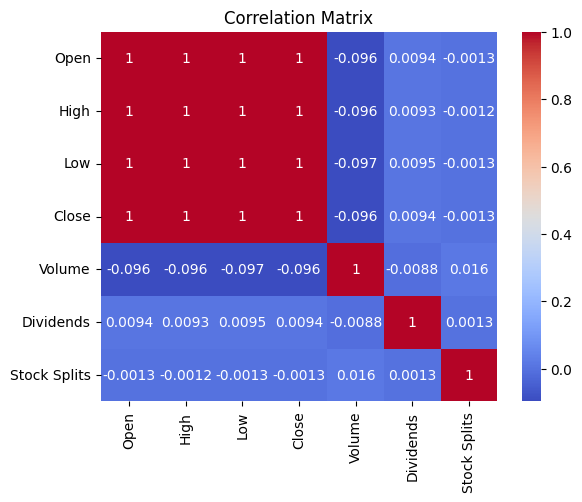

In [15]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

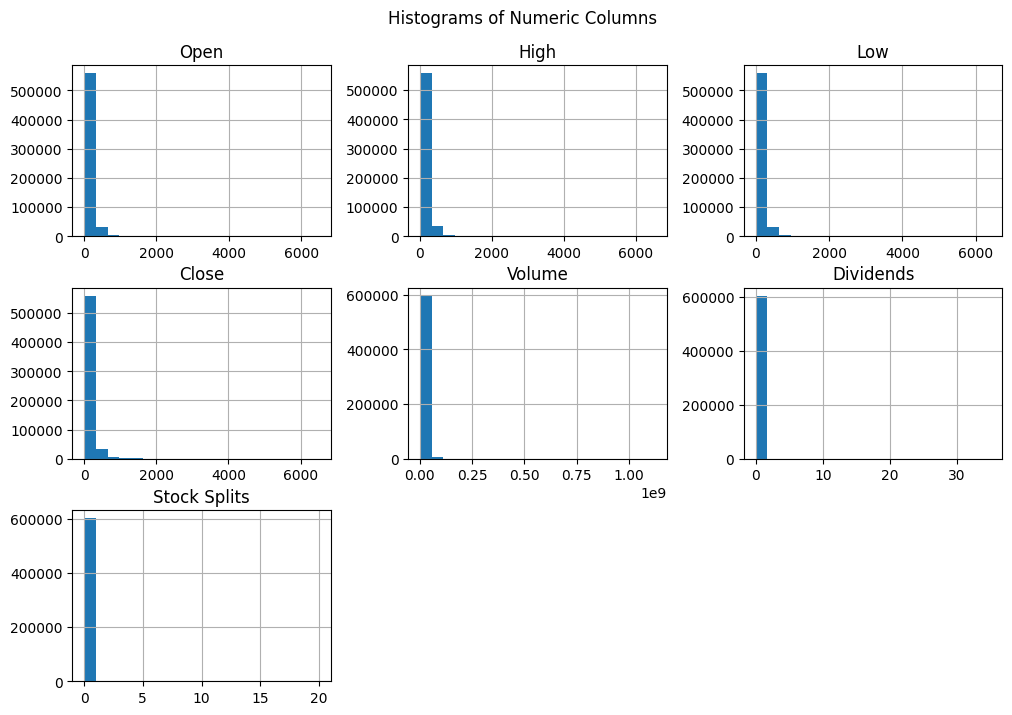

In [16]:
# Histograms for numeric columns
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns', y=0.95)
plt.show()

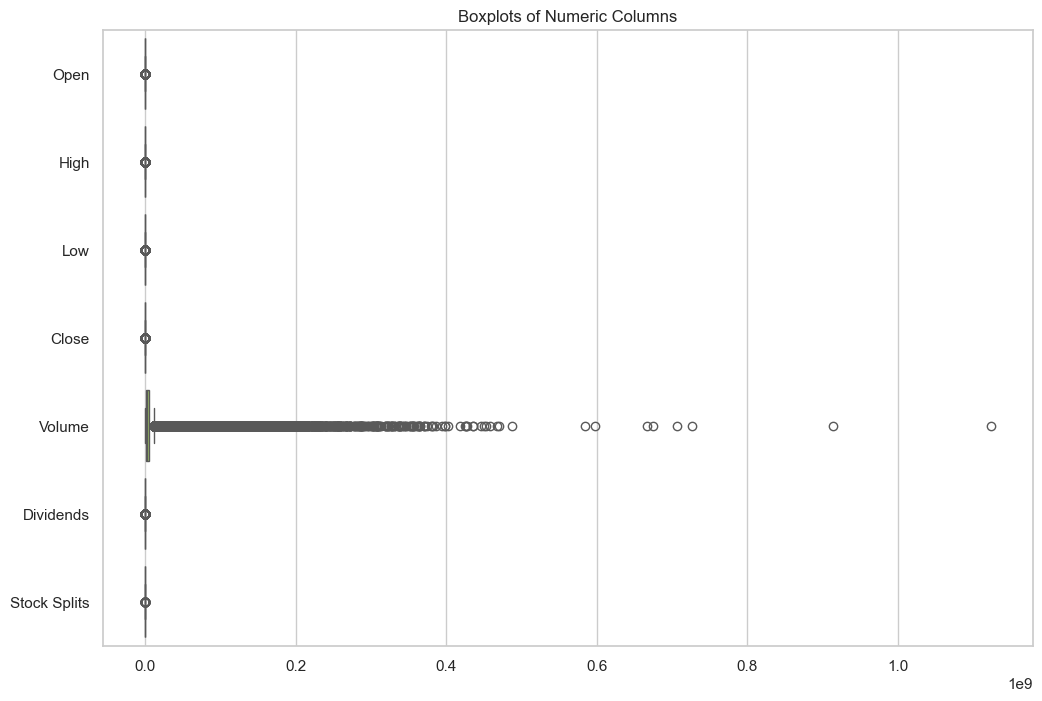

In [17]:
# Boxplots for numeric columns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplots of Numeric Columns')
plt.show()

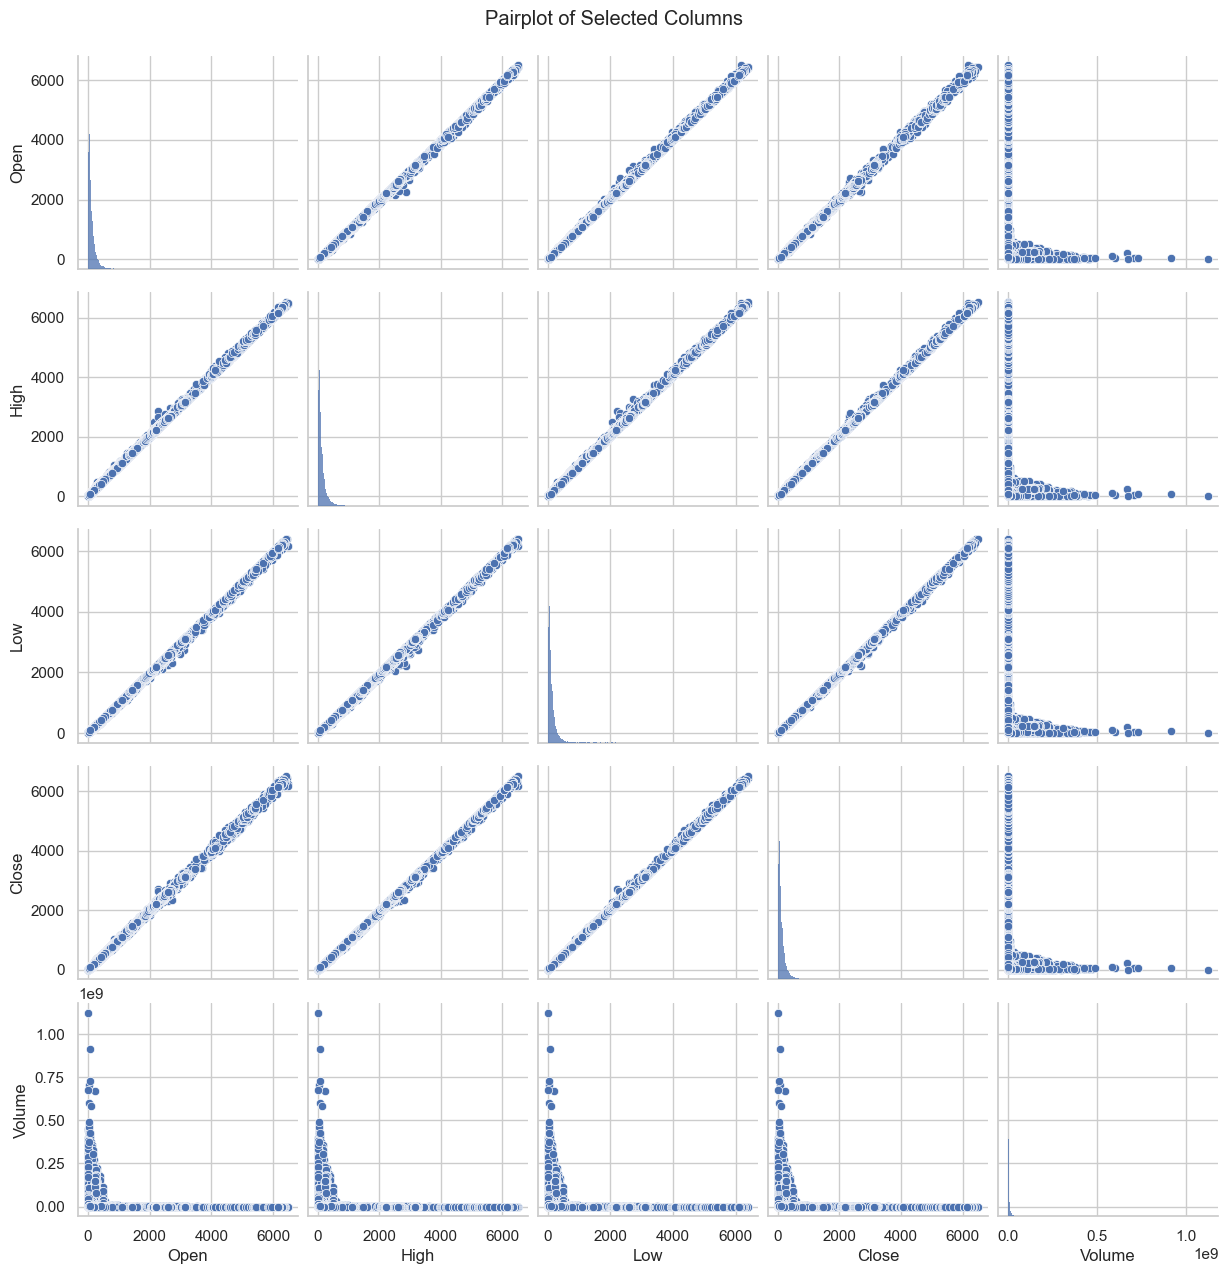

In [18]:
# Pairplot for selected columns
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

Regression Analysis

1. Linear Regression

Mean Squared Error: 5.76314643119236


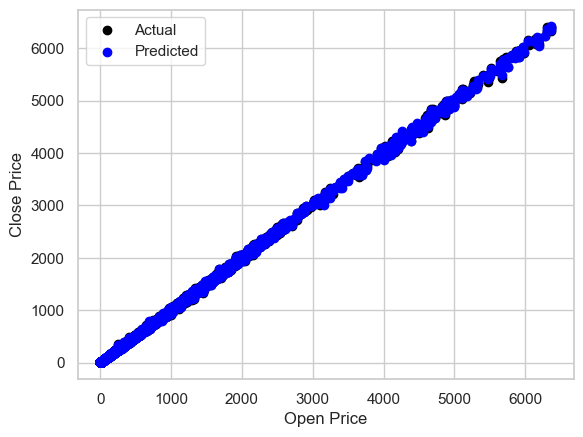

In [19]:
# Select features (X) and target variable (y)
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
target = 'Close'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions
plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
plt.scatter(X_test['Open'], y_pred, color='blue', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Time Series Analysis

In [20]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)


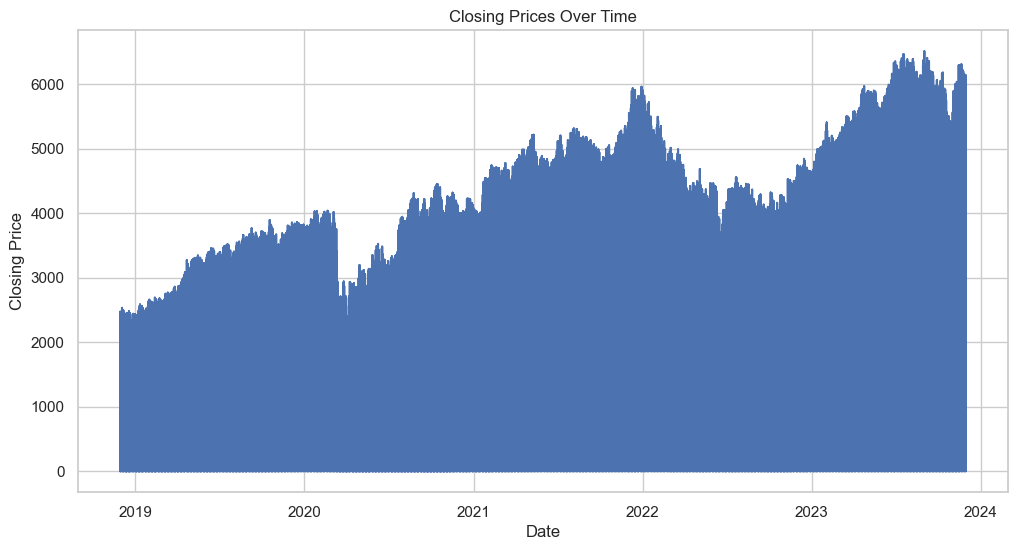

In [21]:
# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
